<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [1]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [3]:
product = pd.read_csv("/content/product_data.csv")
reviews = pd.read_csv("/content/reviews.csv")

In [4]:
product.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0000000,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7000000,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3000000,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1000000,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.9900000,0.0000000


In [5]:
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [6]:
product.drop(columns=["url", "image"], inplace=True)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [7]:
product.describe(include="all")

,asin,brand,title,rating,reviewUrl,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,720,nan,nan,nan
top,B074PYHP6Q,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",nan,https://www.amazon.com/product-reviews/B07D42T6MB,nan,nan,nan
freq,1,346,2,nan,1,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,NaN,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,NaN,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,NaN,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,NaN,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,NaN,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,NaN,122.2500000,336.7250000,0.0000000


In [8]:
reviews.describe(include="all")

,asin,name,rating,date,verified,title,body,helpfulVotes
count,70313,70311,70313.0000000,70313,70313,70299,70292,27886.0000000
unique,720,47323,nan,2983,2,41489,59812,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,1548,6680,nan,234,63162,6437,308,nan
mean,NaN,NaN,3.8121827,NaN,NaN,NaN,NaN,8.1543427
std,NaN,NaN,1.5796615,NaN,NaN,NaN,NaN,31.6642450
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

*Product table Observation*

- 720 unique products
- brand contain 2 null values and in total 10 brand data
- totalReviews is left skewed which means Most of the product have received less than 32 ratings
- Samsung is the top brand among all.
- Rating is in range from 1-5
- Price is in range from 0-999.99

*Review table Observation*

- 70313 reviews
- name contain one null value
- more than 50% of product have 5 rating.


### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

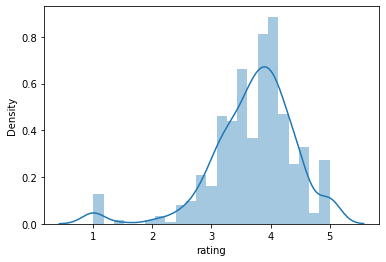

In [9]:
sns.distplot(product["rating"])

**observation:** We see two peaks here

In [10]:
gbp = product.groupby(by="brand")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

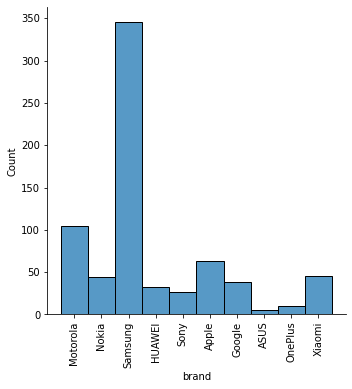

In [11]:
prod = product.dropna()
sns.displot(prod["brand"])
plt.xticks(rotation=90)

**Observation** Samsung branch got most reviews.

In [12]:
data = prod.groupby("brand")["rating"].count()

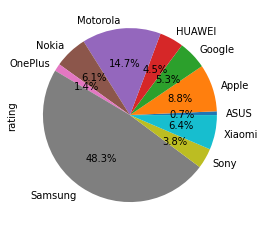

In [13]:
data.plot.pie(autopct="%.1f%%")

### 4.5 Display average rating per brand

In [14]:
data = prod.groupby("brand")["rating"].mean()

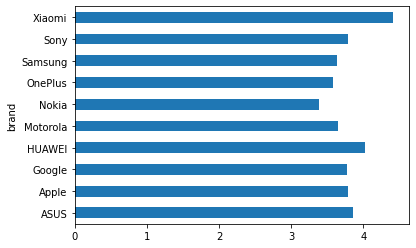

In [15]:
data.plot(x='brand', kind='barh')

### 4.6 Display average price per brand

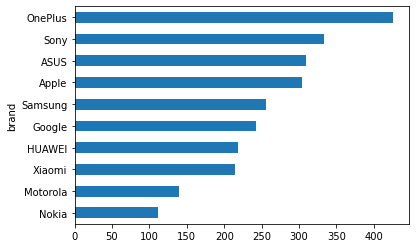

In [16]:
prod.groupby("brand")["price"].mean().sort_values().plot(kind='barh')

### 4.7 Display average 'totalReviews' per brand

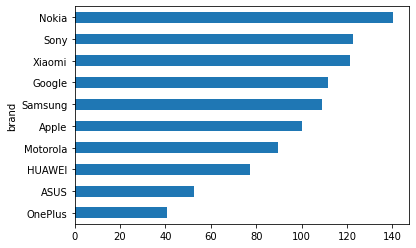

In [17]:
data = prod.groupby("brand")["totalReviews"].mean().sort_values().plot(kind="barh")

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [18]:
merged = reviews.merge(product, how="left", on="asin")

In [19]:
merged.head(2)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000


In [20]:
merged.describe()

,rating_x,helpfulVotes,rating_y,totalReviews,price,originalPrice
count,70313.0000000,27886.0000000,70313.0000000,70313.0000000,70313.0000000,70313.0000000
mean,3.8121827,8.1543427,3.7612831,379.5519463,216.8876700,81.2757570
std,1.5796615,31.6642450,0.4255355,265.6812119,188.3097434,199.1224564
min,1.0000000,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000
25%,3.0000000,1.0000000,3.5000000,153.0000000,99.9900000,0.0000000
50%,5.0000000,2.0000000,3.8000000,340.0000000,179.5000000,0.0000000
75%,5.0000000,5.0000000,4.1000000,558.0000000,300.5500000,0.0000000
max,5.0000000,990.0000000,5.0000000,983.0000000,999.9900000,999.9900000


In [21]:
merged.shape

(70313, 15)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [22]:
merged.rename(columns = {'rating_x':'user_rating', 'title_x': 'review_title', 'title_y':'item_title', 'rating_y':'overall_rating'}, inplace = True)

In [23]:
merged.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'reviewUrl', 'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [24]:
merged_sel = merged[merged["verified"]==True]

In [25]:
merged_sel.shape

(63162, 15)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

In [26]:
product.groupby("brand")["totalReviews"].sum().sort_values(ascending=False).head(1)

brand
Samsung    37701
Name: totalReviews, dtype: int64

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [27]:
filtered = merged_sel[["brand", "body", "price", "user_rating","review_title"]]

In [28]:
filtered.head()

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but"
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

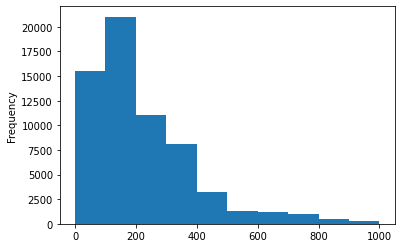

In [29]:
filtered["price"].plot(kind="hist")

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (negative) if the user_Rating <= 3

In [30]:
filtered.loc[filtered["user_rating"]>3, "sentiment"] = 1
filtered.loc[filtered["user_rating"]<=3, "sentiment"] = 0

In [31]:
filtered.head()

,brand,body,price,user_rating,review_title,sentiment
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,0.0000000
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,0.0000000
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product,1.0000000
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but",1.0000000
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...,0.0000000


### 4.15 Check frequency distribution of the 'sentiment'

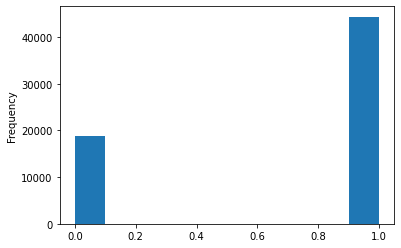

In [32]:
filtered["sentiment"].plot(kind="hist")

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [33]:
filtered.corr()

,price,user_rating,sentiment
price,1.0000000,0.0506117,0.0471113
user_rating,0.0506117,1.0000000,0.9338886
sentiment,0.0471113,0.9338886,1.0000000


In [34]:
pd.crosstab(filtered["brand"], [filtered["sentiment"]], rownames=['brand'], colnames=['sentiment']).apply(lambda x: x/x.sum(), axis=1)

sentiment,0.0000000,1.0000000
brand,,
ASUS,0.3349515,0.6650485
Apple,0.3336751,0.6663249
Google,0.3196333,0.6803667
HUAWEI,0.1831610,0.8168390
Motorola,0.2877884,0.7122116
Nokia,0.3849339,0.6150661
OnePlus,0.1480263,0.8519737
Samsung,0.3034624,0.6965376
Sony,0.3266444,0.6733556


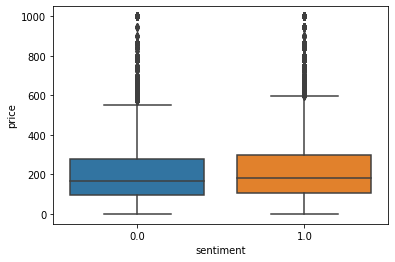

In [35]:
sns.boxplot(filtered["sentiment"], filtered["price"])

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will peform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [36]:
filtered["body"].dtype

dtype('O')

In [37]:
filtered["body"] = filtered["body"].apply(str)

In [38]:
filtered["body"] = filtered["body"].apply(lambda x: x.lower())

In [39]:
filtered.sample(n=5)

,brand,body,price,user_rating,review_title,sentiment
28170,Sony,good phone but after update 7.0 there is a voi...,269.9900000,4,Good phone but after update 7,1.0000000
65015,Samsung,love the face recognition! fingerprint reader ...,299.5000000,5,great camera!,1.0000000
50431,HUAWEI,this phone works like a dream..,229.9900000,5,A good buy,1.0000000
7449,Samsung,i purchased this phone to upgrade from my s3. ...,0.0000000,4,Nice Upgrade From The S3,1.0000000
65986,Samsung,better than expected. works great on metropcs,334.9900000,5,Must buy,1.0000000


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [40]:
filtered["body"] = filtered['body'].str.replace('[^\w\s]','')

In [41]:
filtered.sample(n=5)

,brand,body,price,user_rating,review_title,sentiment
28523,Google,pure lies plain and simple the paint is chipp...,185.0000000,1,Phone has excessive signs of wear: the adverti...,0.0000000
42310,Samsung,bad bad bad,429.9700000,1,Bad bad,0.0000000
51796,Xiaomi,confiable confortable and really good product,159.4900000,5,Great choice,1.0000000
42070,Nokia,this phone has good features but is really slow,194.9700000,2,slow,0.0000000
58937,Samsung,great phone great battery life really glad i b...,649.9900000,5,Great phone,1.0000000


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [42]:
!pip install nltk

In [43]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stop(x):
  final = []
  words = x.split()
  for word in words:
    if not word in stop_words:
      final.append(word)
  return " ".join(final)

filtered["no_stop_body"] = filtered["body"].apply(remove_stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
filtered.sample(5)

,brand,body,price,user_rating,review_title,sentiment,no_stop_body
10377,Samsung,i love this phone it is so worth the money and...,0.0000000,5,I love this phone it is so worth the money and...,1.0000000,love phone worth money would recommend item co...
69099,Motorola,gave this phone to my brother today for his bi...,89.9900000,5,Highly recommend durable mobil phone,1.0000000,gave phone brother today birthday shipped adve...
27139,Samsung,i bought a refurbished phone from the seller e...,0.0000000,5,I bought a refurbished one,1.0000000,bought refurbished phone seller edge cellular ...
21806,Samsung,great device only one flaw the headphones that...,300.5500000,4,HEADPHONES DON'T FIT IN THE HEADPHONE JACK,1.0000000,great device one flaw headphones came phone di...
54852,Samsung,i love this phone looked perfectly new when i ...,324.9900000,5,You won't be dissapointed.,1.0000000,love phone looked perfectly new received may p...


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [45]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize(x):
  final = []
  words = x.split()
  for word in words:
    #print(f"{word} ==> {lemmatizer.lemmatize(word)}")
    lemword = lemmatizer.lemmatize(word)
    #if word != lemword:
    #  print(f"{word} ==> {lemword}")
    final.append(lemword)
  return " ".join(final)

filtered["no_stop_body"] = filtered["no_stop_body"].apply(lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
filtered.sample(5)

,brand,body,price,user_rating,review_title,sentiment,no_stop_body
66921,Xiaomi,very good phone i recommended,163.0000000,5,Good,1.0000000,good phone recommended
3565,Samsung,network connection issues wifi bluetooth not...,154.9700000,2,Everything works EXCEPT:,0.0000000,network connection issue wifi bluetooth working
50299,HUAWEI,i gave up iphone 7 bought huwai im very happy...,229.9900000,5,Best Phone in a small budget!,1.0000000,gave iphone 7 bought huwai im happy u hard dec...
16808,Motorola,this phone works nicely quick response take re...,149.9900000,5,This phone works nicely quick response,1.0000000,phone work nicely quick response take really n...
16948,Motorola,other than not able to root to use unlimited d...,149.9900000,4,... root to use unlimited data thru hotspot it...,1.0000000,able root use unlimited data thru hotspot grea...


### 5.6 Word Frequency (optional)

In [47]:
word_freq = {}
def cal_word_freq(x):
  words = x.split()
  for word in words:
    if word in word_freq:
      word_freq[word] += 1
    else:
      word_freq[word] = 0
filtered["no_stop_body"].apply(cal_word_freq)
len(word_freq)

36109

In [48]:
dic = sorted(word_freq.items(), key=lambda x:x[1], reverse=True)

In [49]:
res = next(iter(dic))
res

('phone', 83386)

### 5.6 Initialize tf-idf vectorizer and transform the preprocessed body text

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered["no_stop_body"])
X.shape

(63162, 36065)

### 5.7 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [51]:
y = filtered["sentiment"]

### 5.9 Split the data into Train & Test Sets

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train, y_train)
print("Training accuracy: {}".format(rf_clf1.score(X_train, y_train)))
print("Test accuracy: {}".format(rf_clf1.score(X_test, y_test)))


Training accuracy: 0.9951908804844742
Test accuracy: 0.89289954880076


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf_clf1.predict(X_test))

array([[2829,  959],
       [ 394, 8451]])

## 7. Write your conclusion

**Observed:**

- Test Accuracy: 89 while training accuracy is 99.5 which tells that our model is overfit.
- True positive: 8439
- True negative: 2851

##. 8. Further Explore
### 8.0 Merge all independent features and the below text preprocessing steps
### 8.1 Check rare words and drop them
### 8.2 Remove emoticon/emojis
### 8.3 Try different vectorizer for vectorization
### 8.4 Use embeddings
### 8.5 Use NN based models

## Drop 50% of words having least occurance frequency

In [53]:
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [54]:
filtered["no_stop_body"] = filtered["no_stop_body"].apply(deEmojify)

In [55]:
word_freq = {}
def cal_word_freq(x):
  words = x.split()
  for word in words:
    if word in word_freq:
      word_freq[word] += 1
    else:
      word_freq[word] = 0
filtered["no_stop_body"].apply(cal_word_freq)
len(word_freq)

36109

In [56]:
dic = {k:v for k,v in sorted(word_freq.items(), key=lambda x:x[1])}

In [57]:
temp = dict(dic)
diciter = iter(temp)
to_remove = []
for i in range(int((len(dic)*60)/100)):
  try:
    k = next(diciter)
    #print(k[0])
    to_remove.append(k)
  except:
    pass

In [58]:
len(to_remove)

21665

In [59]:
def remove_unwated_words(X):
  words = X.split()
  final = []
  for word in words:
    if word not in to_remove:
        final.append(word)
  return " ".join(final)

In [60]:
filtered["no_stop_body"] = filtered["no_stop_body"].apply(remove_unwated_words)

In [61]:
filtered.shape

(63162, 7)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered["no_stop_body"])
X.shape

(63162, 14409)

In [63]:
y = filtered["sentiment"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=5)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train, y_train)
print("Training accuracy: {}".format(rf_clf1.score(X_train, y_train)))
print("Test accuracy: {}".format(rf_clf1.score(X_test, y_test)))

Training accuracy: 0.9951236502960641
Test accuracy: 0.8885089135872835


In [67]:
X_train.shape

(31581, 14409)

*Using Neuran Network*

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
X_train = X_train.toarray()
#y_train = y_train.toarray()
X_test = X_test.toarray()
#y_test = y_test.toarray()
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=10, batch_size=1, validation_data=(X_test, y_test))
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
31581/31581 [==============================] - 109s 3ms/step - loss: 0.3476 - accuracy: 0.8464 - val_loss: 0.2638 - val_accuracy: 0.8905
Epoch 2/10
31581/31581 [==============================] - 80s 3ms/step - loss: 0.2247 - accuracy: 0.9115 - val_loss: 0.2737 - val_accuracy: 0.8904
Epoch 3/10
31581/31581 [==============================] - 77s 2ms/step - loss: 0.2012 - accuracy: 0.9245 - val_loss: 0.2725 - val_accuracy: 0.8933
Epoch 4/10
31581/31581 [==============================] - 79s 2ms/step - loss: 0.1819 - accuracy: 0.9332 - val_loss: 0.2869 - val_accuracy: 0.8937
Epoch 5/10
31581/31581 [==============================] - 94s 3ms/step - loss: 0.1643 - accuracy: 0.9405 - val_loss: 0.2893 - val_accuracy: 0.8900
Epoch 6/10
31581/31581 [==============================] - 92s 3ms/step - loss: 0.1597 - accuracy: 0.9439 - val_loss: 0.3059 - val_accuracy: 0.8897
Epoch 7/10
31581/31581 [==============================] - 93s 3ms/step - loss: 0.1507 - accuracy: 0.9453 - val_loss: 

**Observation**:

Both Neural Network and RandomForest Classifier gave same performance.
We can do hyper parameter turning in NN to increase the performance.